<a href="https://colab.research.google.com/github/Kmuralikrishna25/Churn-Prediction/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [6]:
!pip install tensorflow

In [7]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [12]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset=pd.read_csv('/content/sample_data/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
##Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [5]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
##Feature Engineering

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
##Concatenate these variables with dataframe

X=X.drop(['Geography','Gender'],axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [9]:
X=pd.concat([X,geography,gender],axis=1)

In [10]:
#Splitting the dataset into Training set and Test Set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
##Feature scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [14]:
X_train.shape


(8000, 11)

In [15]:
## Part2- Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [16]:

###lets initialize the ANN

Classifier=Sequential()

In [17]:
## Adding the imput Layer
Classifier.add(Dense(units=11,activation='relu'))

In [18]:
##Adding the first hidden layer
Classifier.add(Dense(units=7,activation='relu'))

In [21]:
#adding the second hudden layer
Classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#adding output layer
Classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
Classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:

import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
##Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:
model_history=Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 [==============================] - 7s 8ms/step - loss: 0.4419 - accuracy: 0.8169 - val_loss: 0.3850 - val_accuracy: 0.8391
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3685 - accuracy: 0.8502 - val_loss: 0.3678 - val_accuracy: 0.8497
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3537 - accuracy: 0.8545 - val_loss: 0.3890 - val_accuracy: 0.8444
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3522 - accuracy: 0.8563 - val_loss: 0.3677 - val_accuracy: 0.8501
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3449 - accuracy: 0.8615 - val_loss: 0.3652 - val_accuracy: 0.8561
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3447 - accuracy: 0.8572 - val_loss: 0.3607 - val_accuracy: 0.8512
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3410 - accuracy: 0.8608 - val_loss: 0.3675 - val_accuracy:

In [ ]:

model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

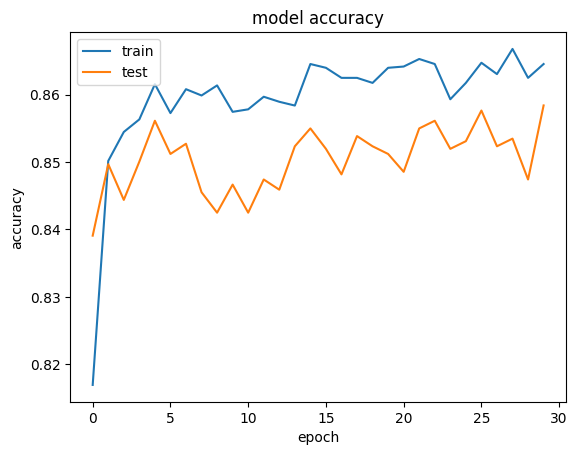

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


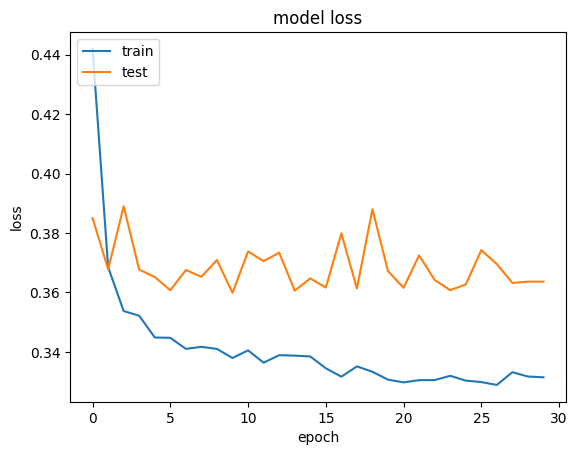

In [ ]:


# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:


# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 2ms/step


In [ ]:
## make the confusion metrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1532,   63],
       [ 217,  188]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.86

In [ ]:
## get the weights
Classifier.get_weights()

[array([[-2.13326067e-01, -1.17234245e-01,  5.31831145e-01,
         -5.61860383e-01, -3.50922167e-01, -2.10304976e-01,
         -3.80840749e-02, -5.98322749e-02,  5.42080961e-02,
         -5.75048089e-01,  4.57049385e-02],
        [ 2.48007751e+00,  1.00495303e+00, -4.16761756e-01,
          1.15221441e+00,  2.43424106e+00,  8.43283907e-02,
          2.29968953e+00,  1.55729508e+00, -1.48341250e+00,
         -1.58163178e+00,  7.09995270e-01],
        [-6.04882061e-01, -1.75477207e+00,  5.23900926e-01,
          6.93739653e-01,  4.09407198e-01,  1.29074052e-01,
          9.90066528e-02,  8.56325865e-01,  6.30806267e-01,
         -1.07558526e-01, -2.50688553e-01],
        [-4.31956232e-01,  1.23380847e-01, -2.09710050e+00,
          3.60000670e-01, -1.14135587e+00, -2.79244494e+00,
          2.51786828e-01, -8.71277452e-01, -2.39224583e-01,
         -4.92981493e-01,  3.79400581e-01],
        [ 6.70987964e-01,  1.74674988e-01, -4.82277781e-01,
          1.83734775e+00, -2.39030480e+00, -